In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='F1', ylabel='F2'>

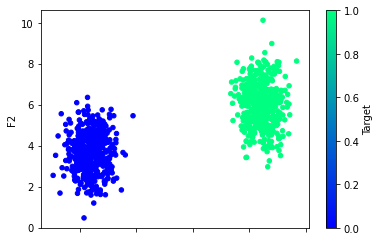

In [2]:
# Generate random dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create DataFrame with random data
df = pd.DataFrame(X, columns=["F1", "F2"])
df["Target"] = y

# Plot random data
df.plot.scatter(x="F1", y="F2", c="Target", colormap="winter")

In [4]:
# Split dataset using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile Sequential model and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit model to training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 7.5179 - accuracy: 0.0240
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 7.2020 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 6.8883 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 6.5892 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 6.2983 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 6.0198 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 5.7518 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 5.4895 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 5.2392 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 4.9

24/24 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.4933
Epoch 82/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7276 - accuracy: 0.4933
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.4933
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.4933
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.4933
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.4933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.4933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4933
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4933
Epoch 91/100


<AxesSubplot:>

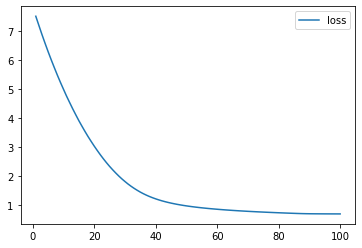

In [12]:
# Create training history DataFrame
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

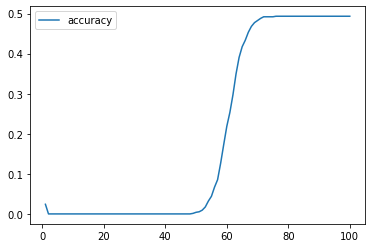

In [13]:
# Accuracy plot
history_df.plot(y="accuracy")

In [14]:
# Evaluate model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6926 - accuracy: 0.5200
Loss: 0.6926014423370361, Accuracy: 0.5199999809265137


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])